In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [66]:
# load data
salary_dataset = pd.read_csv('Position_Salaries.csv')

In [67]:
salary_dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [68]:
# split dataset into predictor matrix(X) and target vector(y)
X = salary_dataset.iloc[:, 1:-1].values # Position and Level are equivalent
y = salary_dataset.iloc[:, -1].values

In [69]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [70]:
# predciting with linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [92]:
no = 3

In [93]:
regressor.predict([[no]])

array([47303.03030303])

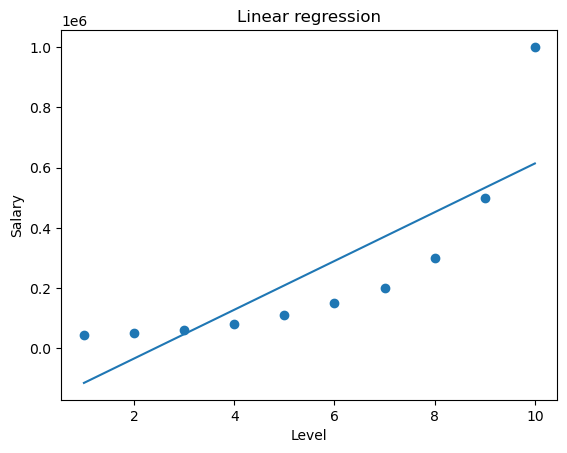

In [74]:
plt.scatter(X, y)
plt.plot(X, regressor.predict(X))
plt.xlabel("Level")
plt.ylabel('Salary')
plt.title("Linear regression")
plt.show()

In [75]:
print(regressor.coef_)
print(regressor.intercept_)

[80878.78787879]
-195333.3333333332


Polynomial Regression

y = b0 + b1x1 + b2x1^2 .... + bnx1^n

In [76]:
# predicting with Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
feature_polyconvertor = PolynomialFeatures(degree = 2)

# apply it to our feature creates a new matrix of features
X_updated = feature_polyconvertor.fit_transform(X)

In [77]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [78]:
X_updated

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [79]:
# We gonna work with the new feature matrix
regressor2 = LinearRegression()
regressor2.fit(X_updated, y)

LinearRegression()

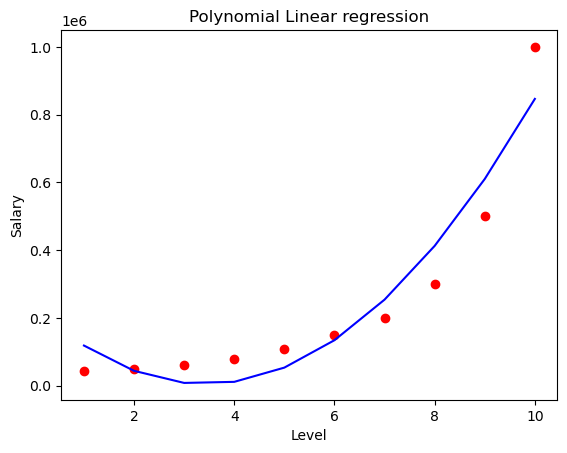

In [102]:
plt.scatter(X,y, color='red')
plt.plot(X, regressor2.predict(X_updated), color='blue')
plt.xlabel("Level")
plt.ylabel('Salary')
plt.title("Polynomial Linear regression")
plt.show()

In [82]:
print(regressor2.coef_)
print(regressor2.intercept_)

[      0.         -132871.21212121   19431.81818182]
232166.6666666665


In [103]:
# Save models in a file
pickle.dump(regressor, open('models/linearRegressor.pkl', 'wb'))
pickle.dump(regressor2, open('models/polyRegressor.pkl', 'wb'))
pickle.dump(feature_polyconvertor, open('models/feature_polyconvertor.pkl', 'wb'))

In [83]:
regressor_model = pickle.load(open('models/regressor.pkl', 'rb'))

In [84]:
regressor_model2 = pickle.load(open('models/regressor2.pkl', 'rb'))

In [85]:
feature = 1

In [86]:
[np.array(feature)]

[array(1)]

In [87]:
#feature_polyconvertor.transform([np.array(feature)])

In [88]:
#features = feature_polyconvertor.transform([np.array(feature)])


In [89]:
prediction = regressor_model.predict([[feature]])

In [98]:
PolyRegressor_model = pickle.load(open('models/polyRegressor.pkl', 'rb'))
polyConvertor = pickle.load(open('models/feature_polyconvertor.pkl', 'rb'))

In [99]:
prediction2 = PolyRegressor_model.predict(polyConvertor.transform([[feature]]))

In [90]:
prediction

array([-114454.54545455])

In [100]:
prediction2

array([118727.27272727])

In [91]:
prediction[0]

-114454.54545454534